In [9]:
import h5py, os, nilearn
import matplotlib.pyplot as plt
import numpy as np
#from nilearn import input_data, datasets, plotting
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import view_img_on_surf, view_img
from nltools.stats import isc, threshold, fdr
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image
import numpy as np
import seaborn as sns

In [2]:
isc_result_folder_path = '../data/01_isc_results/'
files = sorted(os.listdir(isc_result_folder_path))
files[:3]

['isc_task-s01e01a.npy', 'isc_task-s01e01b.npy', 'isc_task-s01e02a.npy']

In [3]:
isc_results = []
for current_file in files:
    f_to_load = isc_result_folder_path + current_file
    isc_results.append(np.load(f_to_load))

isc_results = np.asarray(isc_results)
isc_results.shape

(280, 1000)

### Plot

In [4]:
schaefer = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=1000, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
schaefer_rois_file       = schaefer['maps']

# set up mask
mask = Brain_Data(schaefer['maps'])
mask_x = expand_mask(mask)

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


### Season 1

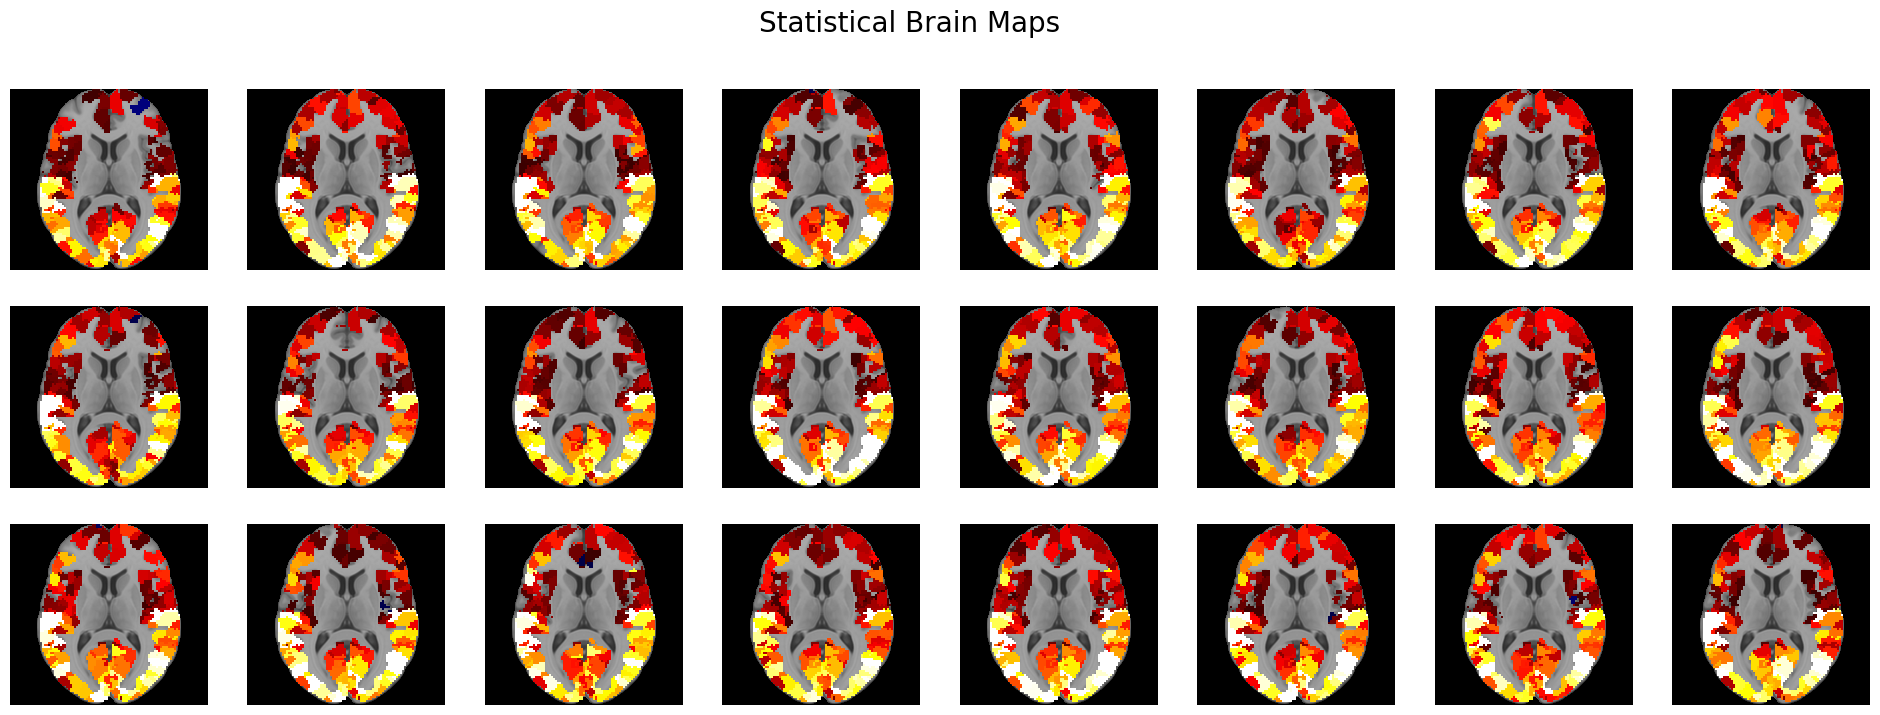

In [5]:
isc_results2 = isc_results[0:48:2, :]  #for season 1
bg_img = datasets.load_mni152_template()
fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()

for i, ax in enumerate(axes):
    one_isc_result = isc_results2[i, :]    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    #result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)
plt.show()

#### Season 2

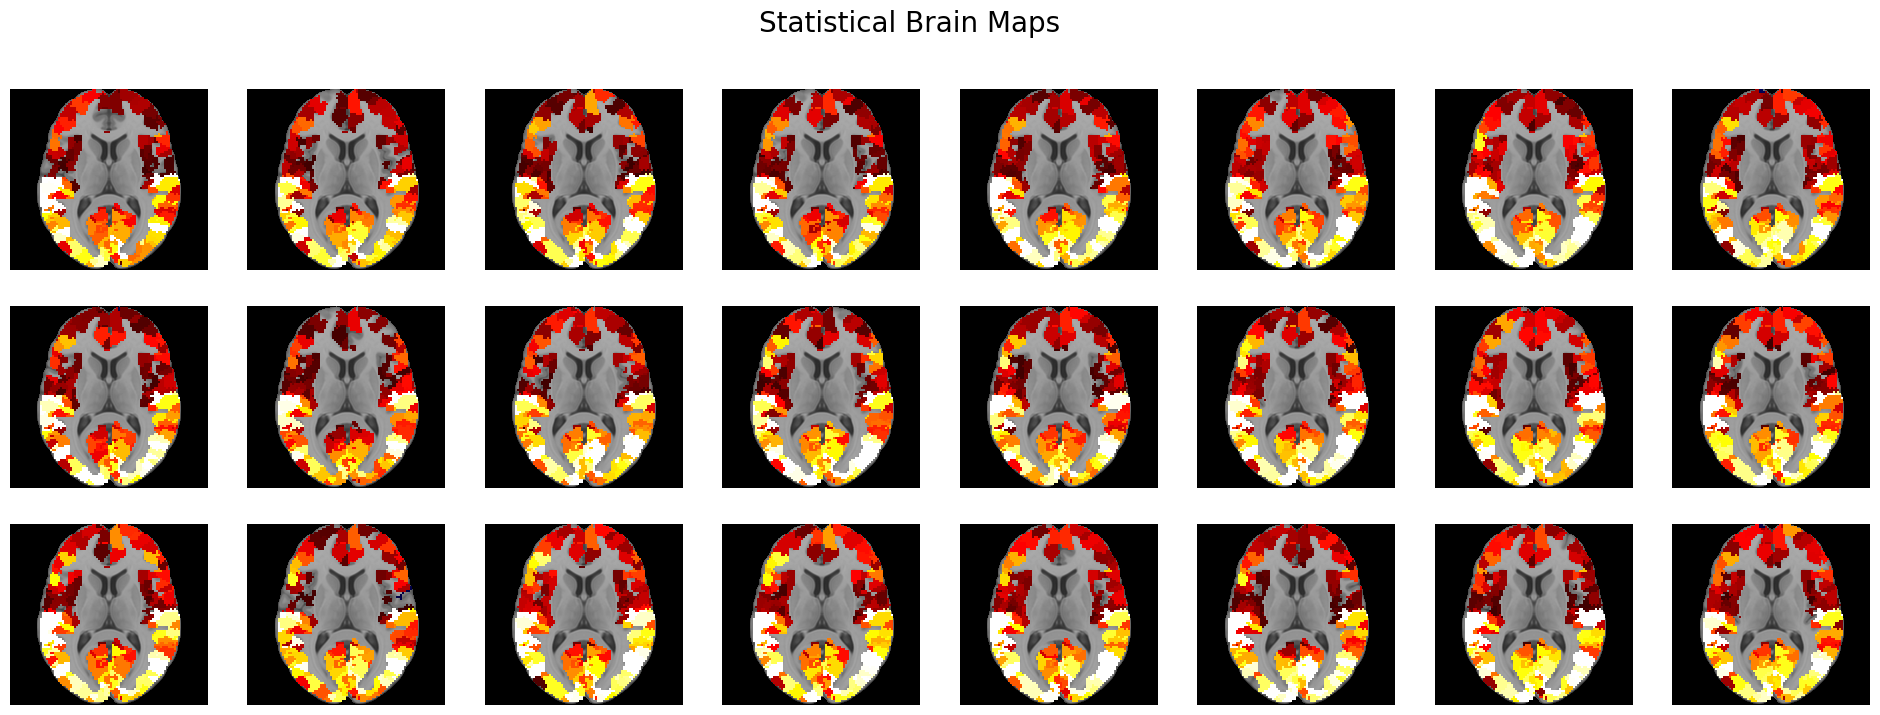

In [7]:
isc_results2 = isc_results[48:96:2, :] #for season2
bg_img = datasets.load_mni152_template()

fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()
for i, ax in enumerate(axes):
    one_isc_result = isc_results2[i, :]
    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)

plt.show()

### Scatterplot Spatial ISC corr S01E01 vs S01E01

0.8705387593784644

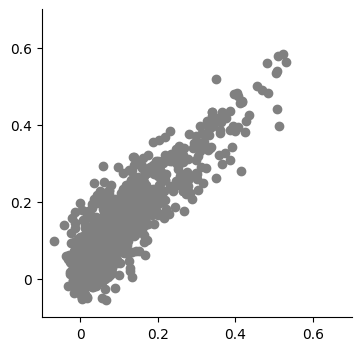

In [10]:
plt.figure(figsize = (4,4))
plt.scatter( isc_results[0, :],
             isc_results[48, :], color = 'gray')
plt.xlim([-0.1, 0.7])
plt.ylim([-0.1, 0.7])
plt.xticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6])
plt.yticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6])
sns.despine()
np.corrcoef( isc_results[0, :],
             isc_results[48, :])[0,1]

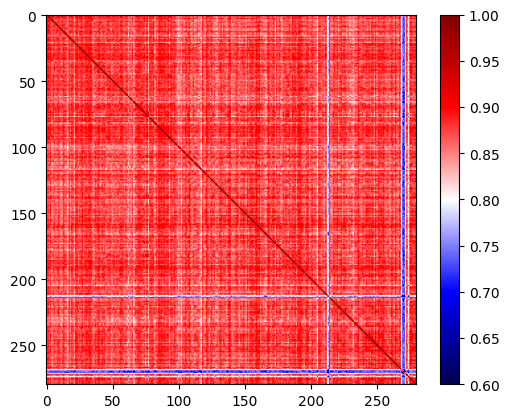

In [84]:
plt.imshow(np.corrcoef(isc_results), vmin = 0.6, vmax = 1, cmap = 'seismic')
plt.colorbar()

0.8670668746804299


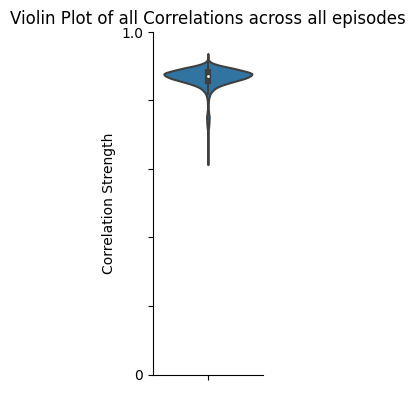

In [97]:
A = np.corrcoef(isc_results)
rows, cols = np.tril_indices(A.shape[0], k=-1)
lower_tri = A[rows, cols]
lower_tri
print(np.mean(lower_tri))


# Violin plot
plt.figure(figsize=(2, 4))
sns.violinplot(y=lower_tri)
plt.title("Violin Plot of all Correlations across all episodes")
plt.ylabel("Correlation Strength")
plt.grid(False)
plt.tight_layout()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.], [0, "", "","", "", 1.])

sns.despine()
plt.show()


In [27]:
isc_results.shape

(280, 1000)

0.8784786737115329
0.8764636616839867
0.8661996552116218
0.874838072619185
0.864589450990115
0.860506629260538


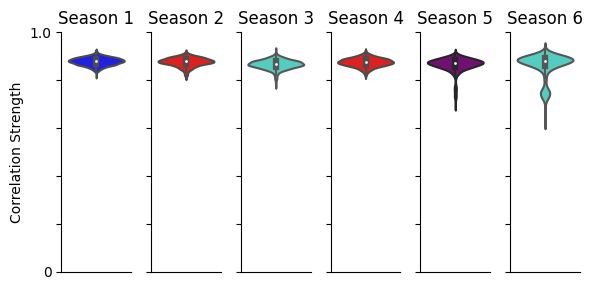

In [49]:
#Season 1: files[0:48]
#Season 2: files[48:96]
#Season 3: files[96:146]
#Season 4: files[146:190]
#Season 5: files[190:236]
#Season 6: files[236:280]

season_onsets  = [0, 48, 96, 146, 190, 236]
season_offsets = [48, 96, 146, 190, 236, 280]
n_seasons = 6
season_colors = ['blue', 'red', 'turquoise', 'red','purple', 'turquoise']

# season_onsets, season_offsets, isc_results, n_seasons already defined

fig, axes = plt.subplots(1, n_seasons, figsize=(6, 3), sharey=True)

for curr_season in range(n_seasons):
    curr_season_onset = season_onsets[curr_season]
    curr_season_offset = season_offsets[curr_season]

    curr_season_isc_results = isc_results[curr_season_onset:curr_season_offset, :]
    A = np.corrcoef(curr_season_isc_results)
    rows, cols = np.tril_indices(A.shape[0], k=-1)
    lower_tri = A[rows, cols]
    print(np.mean(lower_tri))
    
    ax = axes[curr_season]
    sns.violinplot(y=lower_tri, ax=ax, inner="box", color=season_colors[curr_season])
    ax.set_title(f"Season {curr_season + 1}")
    ax.set_xticks([])
    ax.set_ylim(0, 1)
    ax.grid(False)
    
    if curr_season == 0:
        ax.set_ylabel("Correlation Strength")
        ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
        ax.set_yticklabels([0, "", "", "", "", 1.])
    #else:
    #    # Keep ticks but remove the axis *line* (spine)
    #    ax.spines["left"].set_linewidth(0)
    #    ax.set_yticks([])
    #    ax.set_yticklabels([])  # no labels
    #    ax.set_ylabel("")

sns.despine()
plt.tight_layout()
plt.show()

In [24]:
len(files)

280